<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Topic 2: NumPy and Efficient Numerical Programming </h2> 
</center>

_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - April 2017._

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [2]:
# first we load the data:
data = np.load("orion.npy")

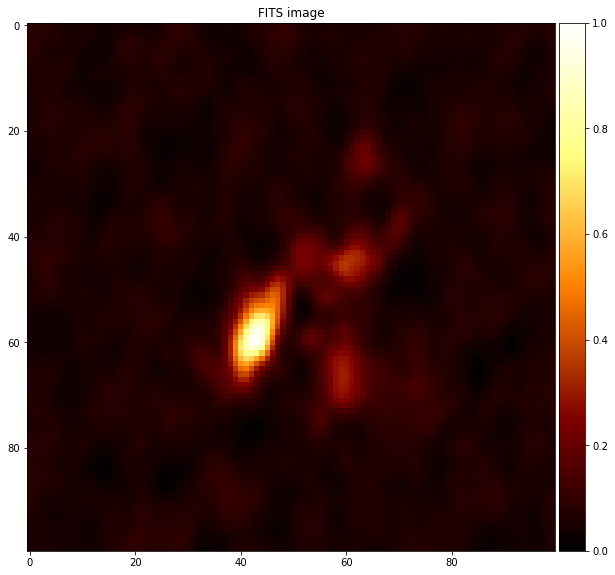

In [3]:
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

In [4]:
def norm_square_dot(vector):
    return np.dot(vector, vector)

def rms(vector):
    quot= 1/(vector.shape[0] * vector.shape[1])
    return np.sqrt(quot*np.dot(vector, vector))

In [5]:
result = rms(data)

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

In [6]:
mask = data > result
for j in range(100):
    for i in range(100):
        if mask[j][i] == False :
            result[j][i] = 0

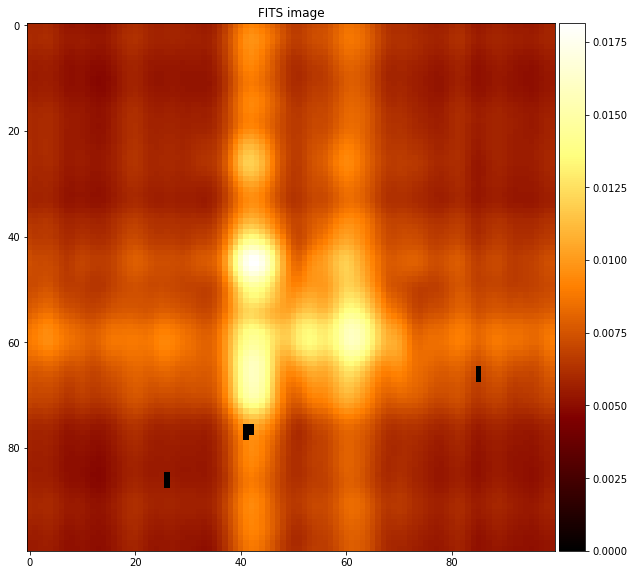

In [7]:
image_plot(result)

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_ (sin generar copias de el mismo).

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [8]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])

In [9]:
def apply_filter(data, mask, kernel_filter):
    sumation = 0
    for j in range(100):
        if j==98:
            break;
        for i in range(100):    
            if i==98:
                break;
            for column in range(j,j+3):
                sumation = 0
                for row in range(i,i+3):
                    if mask[j+1][i+1] == False:
                        break;
                    sumation += data[column][row] * kernel_filter[column%3][row%3]
                    if column == j+2 and row == i+2:
                            data[j+1][i+1] = sumation
    image_plot(data)
    return None

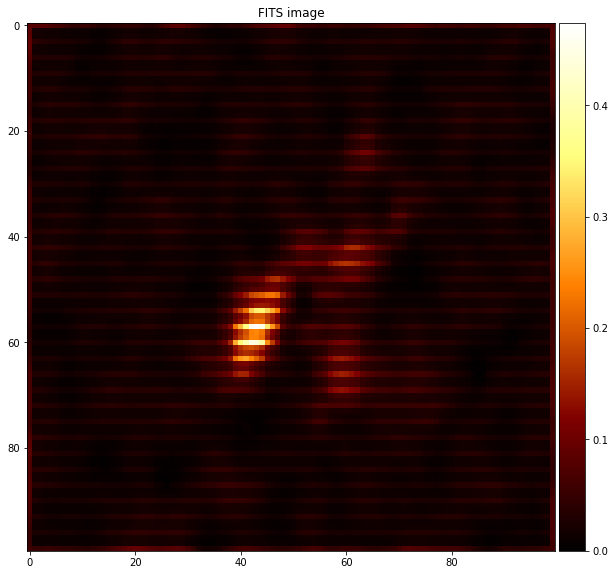

In [10]:
apply_filter(data,mask,kernel_filter)

Supuesto: Pensando que el valor de la sumatoria creada por la convolución va al medio del valor del pixel usable (es decir en el centro del filtro, el valor de la matriz booleana da "True"). Por lo tanto al usar el filtro en "data", y en el centro de la matriz 3x3 , al compararlo con la matriz booleana, hay un false, entonces la operacíon de la convolución para.